# Modelin oluşturulması

In [13]:
class_names = train_ds.class_names
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 1)),
  layers.Conv2D(16, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Modelin optimize edilmesi

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin eğitilmesi

In [15]:

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
273/273 [==============================] - 2459s 9s/step - loss: 1.4593 - accuracy: 0.4839 - val_loss: 1.1941 - val_accuracy: 0.5773
Epoch 2/10
273/273 [==============================] - 38s 138ms/step - loss: 1.1782 - accuracy: 0.5928 - val_loss: 1.0217 - val_accuracy: 0.6564
Epoch 3/10
273/273 [==============================] - 39s 139ms/step - loss: 1.0282 - accuracy: 0.6571 - val_loss: 0.8883 - val_accuracy: 0.7056
Epoch 4/10
273/273 [==============================] - 39s 139ms/step - loss: 0.9197 - accuracy: 0.6877 - val_loss: 0.8759 - val_accuracy: 0.7136
Epoch 5/10
273/273 [==============================] - 40s 145ms/step - loss: 0.8223 - accuracy: 0.7277 - val_loss: 0.6876 - val_accuracy: 0.7640
Epoch 6/10
273/273 [==============================] - 39s 139ms/step - loss: 0.7421 - accuracy: 0.7557 - val_loss: 0.6524 - val_accuracy: 0.7892
Epoch 7/10
273/273 [==============================] - 39s 139ms/step - loss: 0.6729 - accuracy: 0.7793 - val_loss: 0.5700 - val_acc

# Modelin sonuçlarının görsellerle ifade edilmesi

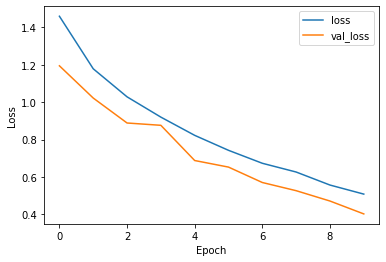

In [16]:

plt.plot(history.history['loss'], label ='loss')

plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel("Epoch")
plt.ylabel('Loss')

plt.legend()

plt.show()

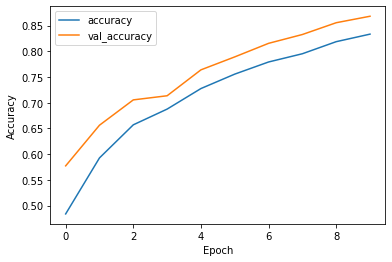

In [17]:
plt.plot(history.history['accuracy'], label ='accuracy')

plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.legend()

plt.show()

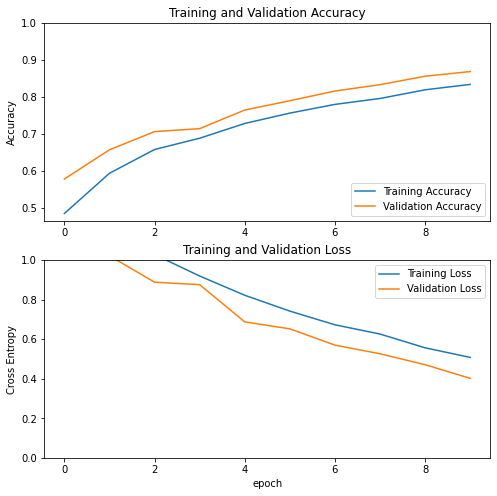

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Dense ve Dropuot katmanlarının eklenmesi

In [24]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])



#Epoch değerinin arttırılarak modelin eğitilmesi

In [26]:
results = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
273/273 [==============================] - 39s 138ms/step - loss: 1.4883 - accuracy: 0.3791 - val_loss: 1.2837 - val_accuracy: 0.4250
Epoch 2/20
273/273 [==============================] - 40s 142ms/step - loss: 1.3615 - accuracy: 0.3989 - val_loss: 1.1764 - val_accuracy: 0.4387
Epoch 3/20
273/273 [==============================] - 39s 138ms/step - loss: 1.3266 - accuracy: 0.3961 - val_loss: 1.2112 - val_accuracy: 0.4204
Epoch 4/20
273/273 [==============================] - 38s 137ms/step - loss: 1.3141 - accuracy: 0.4001 - val_loss: 1.1246 - val_accuracy: 0.4467
Epoch 5/20
273/273 [==============================] - 38s 137ms/step - loss: 1.3107 - accuracy: 0.3951 - val_loss: 1.1272 - val_accuracy: 0.4456
Epoch 6/20
273/273 [==============================] - 40s 142ms/step - loss: 1.2800 - accuracy: 0.4095 - val_loss: 1.1833 - val_accuracy: 0.4353
Epoch 7/20
273/273 [==============================] - 38s 137ms/step - loss: 1.2832 - accuracy: 0.4091 - val_loss: 1.1363 - val_ac

### Epoch sayısını 10'dan 20'ye çıkardığımızda ve Dense ile Dropout katmanları eklendiğinde modeliminizin accuracy değeri yüzde 86'dan 45'e düştü.  

### Modelimizde gizli katmanlarında relu yerine sigmoid kullandığımızda accuracy değerinde bir düşüş gerçekleşti ve bu yüzden relu'yu tercih ettik. 

### Spectrogramların orjinal boyutlarını kullandığımızda model performansı ve accuracy değerleri(0.30) düşük çıktı. Bu yüzden resizing(180,180) tercih ettik ve accuracy değerimiz çok daha yüksek(0.86) çıktı. 

